Proyecto ASE

Estudiante Isabel Cardos Gimeno

Fecha 11/11/2022

##Descripción del proyecto

Factores que afectaron el desempeño de los estudiantes en PLANEA de matemáticas en tiempos de COVID

* ¿Qué variables están relacionadas con el desempeño del estudiante y de qué manera? —> matriz de correlación

* ¿El turno (vespertino o matutino) en el que está afectó en el desempeño del estudiante?
* ¿Su ubicación geográfica afectó en el desempeño del estudiante? —> cambiar pregunta y hacer agrupamiento
* ¿El sostenimiento de la institución (pública o privada) afectó en el desempeño del estudiante?
* ¿El medio por el que se realizó la prueba PLANEA afectó en el desempeño del estudiante?
* ¿Haber usado calculadora afectó en su desempeño?
* ¿El saber que iba a abandonar el siguiente ciclo escolar afectó en el desempeño del estudiante?


Primero se deben obtener los datos para el análisis. Estos estan en google drive, por lo que se deben importar. Antes hay que definir e importar todas las librerias que se van a usar.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Conectar con drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


Una vez conectado el google drive, se cargan los archivos de interés


In [3]:
df=pd.read_csv('/content/drive/MyDrive/ASE/Secundaria Matemáticas v5.csv')

##Un vistazo a los datos

In [4]:
#Se obtienen las dimensiones de los datos
df.shape

(46348, 66)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46348 entries, 0 to 46347
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         46348 non-null  int64  
 1   R1.1               46348 non-null  int64  
 2   R2.1               46348 non-null  int64  
 3   R3.1               46348 non-null  int64  
 4   R5.1               46348 non-null  int64  
 5   R6.1               46348 non-null  int64  
 6   R7.1               46348 non-null  int64  
 7   R8.1               46348 non-null  int64  
 8   R9.1               46348 non-null  int64  
 9   R10.1              46348 non-null  int64  
 10  R11.1              46348 non-null  int64  
 11  R12.1              46348 non-null  int64  
 12  R13.1              46348 non-null  int64  
 13  R14.1              46348 non-null  int64  
 14  R15.1              46348 non-null  int64  
 15  R16.1              46348 non-null  int64  
 16  R17.1              463

In [6]:
# un vistazo de los datos
df.head()

,Unnamed: 0,R1.1,R2.1,R3.1,R5.1,R6.1,R7.1,R8.1,R9.1,R10.1,...,Adulto,Calculadora,Medio,EnfermoCovid,AprendeEnCasa,Mejor,Peor,Abandono,AbandonoCovid,CP
0,1,0,1,1,1,0,0,1,0,0,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,1,0,0,1,0,0,0,0,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,1,1,1,1,1,1,1,1,...,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,1,1,1,0,1,1,0,1,...,No,No,Celular,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,1,0,0,0,0,0,0,1,...,No,No,Celular,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,Unnamed: 0,R1.1,R2.1,R3.1,R5.1,R6.1,R7.1,R8.1,R9.1,R10.1,...,Adulto,Calculadora,Medio,EnfermoCovid,AprendeEnCasa,Mejor,Peor,Abandono,AbandonoCovid,CP
46343,50484,0,0,1,1,1,1,1,0,0,...,No,No,Celular,No,No lo usé,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,27448.0
46344,50485,0,1,0,1,1,1,1,1,1,...,No,Sí,Celular,No,Lo usé poco,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,1.0,1.0,45480.0
46345,50486,0,1,0,0,0,1,1,1,1,...,No,Sí,Tableta,No,Algunas veces lo usé,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,32409.0
46346,50487,0,1,0,0,0,1,1,1,1,...,No,Sí,Tableta,No,Algunas veces lo usé,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,32409.0
46347,50488,1,0,0,0,0,0,0,0,0,...,No,No,Celular,No,Lo usé poco,El uso que le di a la tecnología para mis clas...,La manera en que mis profesores(as) me dieron ...,0.0,0.0,27800.0


In [8]:
#Analizas los nombres de las columnas en busqueda de errores
cols_names = df.columns
for col_name in cols_names:
  print(col_name + "\n")

Unnamed: 0

R1.1

R2.1

R3.1

R5.1

R6.1

R7.1

R8.1

R9.1

R10.1

R11.1

R12.1

R13.1

R14.1

R15.1

R16.1

R17.1

R19.1

R20.1

R21.1

R22.1

R23.1

R24.1

R25.1

R26.1

R27.1

R29.1

R32.1

R33.1

R34.1

R35.1

R36.1

R37.1

R38.1

R39.1

R40.1

R41.1

R44.1

R45.1

R46.1

R47.1

R48.1

R50.1

Lógitos

correctas

planea

niveldes

CCT

Sexo

Turno

Estado

Años

Sostenimiento

Contexto

Dificultad

CoherenciaEnsEval

Adulto

Calculadora

Medio

EnfermoCovid

AprendeEnCasa

Mejor

Peor

Abandono

AbandonoCovid

CP



In [9]:
# determinando los valores faltantes en los datos
na=pd.DataFrame(df.isna().sum())
na

,0
Unnamed: 0,0
R1.1,0
R2.1,0
R3.1,0
R5.1,0
...,...
Mejor,388
Peor,388
Abandono,388
AbandonoCovid,388


In [10]:
#Eliminar la columna Unnamed: 0
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,R1.1,R2.1,R3.1,R5.1,R6.1,R7.1,R8.1,R9.1,R10.1,R11.1,...,Adulto,Calculadora,Medio,EnfermoCovid,AprendeEnCasa,Mejor,Peor,Abandono,AbandonoCovid,CP
0,0,1,1,1,0,0,1,0,0,0,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,0,1,0,0,0,0,0,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,1,1,1,1,1,1,1,0,...,No,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1,1,0,1,1,0,1,1,...,No,No,Celular,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,0,0,0,0,0,0,1,0,...,No,No,Celular,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46343,0,0,1,1,1,1,1,0,0,1,...,No,No,Celular,No,No lo usé,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,27448.0
46344,0,1,0,1,1,1,1,1,1,1,...,No,Sí,Celular,No,Lo usé poco,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,1.0,1.0,45480.0
46345,0,1,0,0,0,1,1,1,1,0,...,No,Sí,Tableta,No,Algunas veces lo usé,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,32409.0
46346,0,1,0,0,0,1,1,1,1,0,...,No,Sí,Tableta,No,Algunas veces lo usé,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,32409.0


Se eliminan todos los individuos con valores faltantes

In [11]:
#Eliminar valores faltantes
df_limpio=df.dropna(axis=0, inplace=False)
df_limpio.isna().sum()

R1.1             0
R2.1             0
R3.1             0
R5.1             0
R6.1             0
                ..
Mejor            0
Peor             0
Abandono         0
AbandonoCovid    0
CP               0
Length: 65, dtype: int64

Ver con qué dimensiones queda el nuevo DF

In [12]:
df_limpio.shape

(45566, 65)

In [13]:
df_limpio

,R1.1,R2.1,R3.1,R5.1,R6.1,R7.1,R8.1,R9.1,R10.1,R11.1,...,Adulto,Calculadora,Medio,EnfermoCovid,AprendeEnCasa,Mejor,Peor,Abandono,AbandonoCovid,CP
780,0,1,1,1,0,0,0,0,1,1,...,No,No,Tableta,No,No sé qué es eso,El uso que le di a la tecnología para mis clas...,La manera en que mis profesores(as) me dieron ...,0.0,0.0,31000.0
781,0,1,0,1,0,0,0,1,0,1,...,No,No,Tableta,No,Lo usé poco,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,31214.0
782,1,1,0,0,1,0,0,0,0,0,...,No,No,Celular,No,No sé qué es eso,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,353612.0
783,0,1,0,0,0,0,1,1,0,1,...,No,No,Tableta,Sí,Lo usé poco,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,31000.0
784,1,1,1,1,1,1,1,0,1,1,...,No,No,Tableta,No,No sé qué es eso,La manera en que mis profesores(as) me dieron ...,Mi estabilidad emocional,0.0,0.0,31060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46343,0,0,1,1,1,1,1,0,0,1,...,No,No,Celular,No,No lo usé,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,27448.0
46344,0,1,0,1,1,1,1,1,1,1,...,No,Sí,Celular,No,Lo usé poco,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,1.0,1.0,45480.0
46345,0,1,0,0,0,1,1,1,1,0,...,No,Sí,Tableta,No,Algunas veces lo usé,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,32409.0
46346,0,1,0,0,0,1,1,1,1,0,...,No,Sí,Tableta,No,Algunas veces lo usé,El uso que le di a la tecnología para mis clas...,Mi estabilidad emocional,0.0,0.0,32409.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


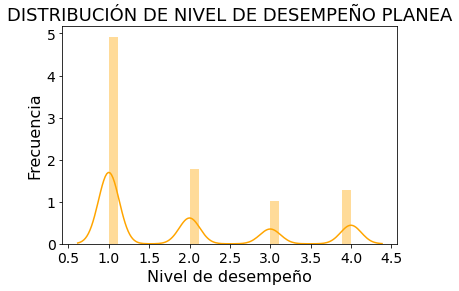

In [14]:
#Grafica de la distribución de puntuación PLANEA

sns.distplot(df_limpio['niveldes'], 
            color = 'orange')
plt.title('DISTRIBUCIÓN DE NIVEL DE DESEMPEÑO PLANEA', 
          fontsize = 18)
plt.xlabel('Nivel de desempeño', 
           fontsize = 16)
plt.ylabel('Frecuencia', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

##Categorización de los datos

Se convierten los datos de forma string en categorias para facilitar su manejo

Se crea un nuevo DF para no alterar los datos originales

In [15]:
#Copiar el df_limpio en otro para no alterar los datos en caso de que algo no salga bien
df_categorias=df_limpio.copy()

Se convierte la columna de "CCT" en categorias, donde:

In [16]:
df_categorias['CCT'] = pd.Categorical(df_categorias['CCT'])
df_categorias['code_cct'] = df_categorias['CCT'].cat.codes
df_categorias['CCT'].unique()

['08PES0801J', '08PES0301J', '08ETV0043L', '08PEZ0301J', '08ETV0174D', ..., 'DES0031M', '14DST0122W', '14des0015v', '5362916', '15PES1365K']
Length: 4501
Categories (4501, object): [', gc,cgh,,', '.', '0', '000000000I', ..., 'sfsdfsfd', 'vale', '|4DST0111Q',
                            'ü•∞ü•∞']

Se convierte la columna de "Sexo" en categorias, donde:

* 0=Hombre

* 1=Mujer

* 2=Prefiero no decirlo

In [17]:
df_categorias['Sexo'] = pd.Categorical(df_categorias['Sexo'])
df_categorias['code_sexo'] = df_categorias['Sexo'].cat.codes
df_categorias['Sexo'].unique()

['Hombre', 'Mujer', 'Prefiero no decirlo']
Categories (3, object): ['Hombre', 'Mujer', 'Prefiero no decirlo']

Se covierte la columna "Turno" en categorias, donde:
* 0=Matutino
* 1=Vespertino

In [18]:
df_categorias['Turno'] = pd.Categorical(df_categorias['Turno'])
df_categorias['code_turno'] = df_categorias['Turno'].cat.codes
df_categorias['Turno'].unique()

['Matutino', 'Vespertino']
Categories (2, object): ['Matutino', 'Vespertino']

Se covierte la columna "Estado" en categorias, donde:

In [19]:
df_categorias['Estado'] = pd.Categorical(df_categorias['Estado'])
df_categorias['code_estado'] = df_categorias['Estado'].cat.codes
df_categorias['Estado'].unique()
i = 0

list_estado = df_categorias["Estado"].unique().tolist()

for est in list_estado: # Se debe organizar alfabeticamente la lista list_estado
  print(str(i) + " - " + est)
  i += 1

0 - Chihuahua
1 - Durango
2 - Sinaloa
3 - Jalisco
4 - México
5 - Ciudad de México
6 - Campeche
7 - Tamaulipas
8 - Sonora
9 - Coahuila de Zaragoza
10 - Guanajuato
11 - Chiapas
12 - Hidalgo
13 - Veracruz de Ignacio de la Llave
14 - Yucatán
15 - Morelos
16 - Zacatecas
17 - Aguascalientes
18 - Colima
19 - Guerrero
20 - Nuevo León
21 - Baja California
22 - San Luis Potosí
23 - Baja California Sur
24 - Puebla
25 - Quintana Roo
26 - Tlaxcala
27 - Oaxaca
28 - Michoacán de Ocampo
29 - Nayarit


In [20]:
pepe = df_categorias[df_categorias["code_estado"] == 1]
pepe["Estado"]

11909    Baja California
30393    Baja California
30888    Baja California
34627    Baja California
35952    Baja California
37486    Baja California
40617    Baja California
42190    Baja California
44203    Baja California
Name: Estado, dtype: category
Categories (30, object): ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', ...,
                          'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán',
                          'Zacatecas']

Se covierte la columna "Sostenimiento" en categorias, donde:

* 0=Privada
* 1=Pública

In [21]:
df_categorias['Sostenimiento'] = pd.Categorical(df_categorias['Sostenimiento'])
df_categorias['code_sostenimiento'] = df_categorias['Sostenimiento'].cat.codes
df_categorias['Sostenimiento'].unique()

['Privada', 'Pública']
Categories (2, object): ['Privada', 'Pública']

Se convierte la columna "Contexto" en categorias, donde:

* 0=Vivo en el campo
* 1= Vivo en la Ciudad (que no es la capital de mi Estado)
* 2= Vivo en la ciudad (La capital de mi Estado)

In [22]:
df_categorias['Contexto'] = pd.Categorical(df_categorias['Contexto'])
df_categorias['code_contexto'] = df_categorias['Contexto'].cat.codes
df_categorias['Contexto'].unique()

['Vivo en la ciudad (La capital de mi Estado)', 'Vivo en la ciudad (Que no es la capital de mi..., 'Vivo en el campo']
Categories (3, object): ['Vivo en el campo', 'Vivo en la ciudad (La capital de mi Estado)',
                         'Vivo en la ciudad (Que no es la capital de mi...]

Se conviete la columna "Adulto" en categorias, donde:

* 0=No

In [23]:
df_categorias['Adulto'] = pd.Categorical(df_categorias['Adulto'])
df_categorias['code_adulto'] = df_categorias['Adulto'].cat.codes
df_categorias['Adulto'].unique()

['No']
Categories (1, object): ['No']

Se convierte la columna "Calculadora" en categorias, donde:

* 0=No
* 1=Sí

In [24]:
df_categorias['Calculadora'] = pd.Categorical(df_categorias['Calculadora'])
df_categorias['code_calculadora'] = df_categorias['Calculadora'].cat.codes
df_categorias['Calculadora'].unique()

['No', 'Sí']
Categories (2, object): ['No', 'Sí']

Se convierte la columna "Medio" en categorias, donde:

* 0=Celular
* 1=Computadora o laptop
* 2=En físico (capturado por el/la docente)
* 3=Tableta

In [25]:
df_categorias['Medio'] = pd.Categorical(df_categorias['Medio'])
df_categorias['code_medio'] = df_categorias['Medio'].cat.codes
df_categorias['Medio'].unique()

['Tableta', 'Celular', 'Computadora o laptop', 'En físico (capturado por el/la docente)']
Categories (4, object): ['Celular', 'Computadora o laptop',
                         'En físico (capturado por el/la docente)', 'Tableta']

Se convierte la columna "EnfermoCovid" en categorias, donde:

* 0=No
* 1=No estoy seguro/a
* 2=Sí

In [26]:
df_categorias['EnfermoCovid'] = pd.Categorical(df_categorias['EnfermoCovid'])
df_categorias['code_enfermocovid'] = df_categorias['EnfermoCovid'].cat.codes
df_categorias['EnfermoCovid'].unique()

['No', 'Sí', 'No estoy seguro/a']
Categories (3, object): ['No', 'No estoy seguro/a', 'Sí']

Se convierte la columna "AprendeEnCasa" en categorias, donde:

* 0=Algunas veces lo usé
* 1=Lo usé poco
* 2=Lo usé todo el tiempo
* 3=Muchas veces lo usé
* 4=No lo usé
* 5=No sé qué es eso

In [27]:
df_categorias['AprendeEnCasa'] = pd.Categorical(df_categorias['AprendeEnCasa'])
df_categorias['code_aprendeencasa'] = df_categorias['AprendeEnCasa'].cat.codes
df_categorias['AprendeEnCasa'].unique()

['No sé qué es eso', 'Lo usé poco', 'No lo usé', 'Lo usé todo el tiempo', 'Muchas veces lo usé', 'Algunas veces lo usé']
Categories (6, object): ['Algunas veces lo usé', 'Lo usé poco', 'Lo usé todo el tiempo',
                         'Muchas veces lo usé', 'No lo usé', 'No sé qué es eso']

Se convierte la columna "Mejor" en categorias, donde:
* 0=El uso que le di a la tecnología para mis clases en este tiempo
* 1= La manera en que mis profesores(as) me dieron tiempo
* 2= Mi estabilidad emocional

In [28]:
df_categorias['Mejor'] = pd.Categorical(df_categorias['Mejor'])
df_categorias['code_mejor'] = df_categorias['Mejor'].cat.codes
df_categorias['Mejor'].unique()

['El uso que le di a la tecnología para mis cla..., 'La manera en que mis profesores(as) me dieron..., 'Mi estabilidad emocional']
Categories (3, object): ['El uso que le di a la tecnología para mis cla..., 'La manera en que mis profesores(as) me dieron...,
                         'Mi estabilidad emocional']

Se convierte la columna "Peor" en categorias, donde:
* 0=El uso que le di a la tecnología para mis clases en este tiempo
* 1= La manera en que mis profesores(as) me dieron tiempo
* 2= Mi estabilidad emocional

In [29]:
df_categorias['Peor'] = pd.Categorical(df_categorias['Peor'])
df_categorias['code_peor'] = df_categorias['Peor'].cat.codes
df_categorias['Peor'].unique()

['La manera en que mis profesores(as) me dieron..., 'Mi estabilidad emocional', 'El uso que le di a la tecnología para mis cla...]
Categories (3, object): ['El uso que le di a la tecnología para mis cla..., 'La manera en que mis profesores(as) me dieron...,
                         'Mi estabilidad emocional']

In [30]:
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45566 entries, 780 to 46347
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   R1.1                45566 non-null  int64   
 1   R2.1                45566 non-null  int64   
 2   R3.1                45566 non-null  int64   
 3   R5.1                45566 non-null  int64   
 4   R6.1                45566 non-null  int64   
 5   R7.1                45566 non-null  int64   
 6   R8.1                45566 non-null  int64   
 7   R9.1                45566 non-null  int64   
 8   R10.1               45566 non-null  int64   
 9   R11.1               45566 non-null  int64   
 10  R12.1               45566 non-null  int64   
 11  R13.1               45566 non-null  int64   
 12  R14.1               45566 non-null  int64   
 13  R15.1               45566 non-null  int64   
 14  R16.1               45566 non-null  int64   
 15  R17.1               45566 non-null

##Análisis de datos

Se analiza la correlación entre variables en Weka, esto con el  objetivo de contestar a la pregunta "¿Qué variables están relacionadas con el desempeño del estudiante y de qué manera?", para identificar cuáles son las columnas con las que nos interesa quedarnos 

Se crea un nuevo DF en el qué estan las variables únicamente numéricas

In [31]:
df_final=df_categorias[['planea', 'niveldes', 'Años', 'Dificultad', 'CoherenciaEnsEval', 'Abandono', 'AbandonoCovid', 'CP', 'code_sexo', 'code_turno',
                       'code_sostenimiento', 'code_contexto', 'code_adulto', 'code_calculadora', 'code_medio', 'code_enfermocovid', 'code_aprendeencasa',
                       'code_mejor', 'code_peor', 'code_estado', 'code_cct']].copy()
df_final.shape

(45566, 21)

In [32]:
df_final

,planea,niveldes,Años,Dificultad,CoherenciaEnsEval,Abandono,AbandonoCovid,CP,code_sexo,code_turno,...,code_contexto,code_adulto,code_calculadora,code_medio,code_enfermocovid,code_aprendeencasa,code_mejor,code_peor,code_estado,code_cct
780,514,2,15.0,3,5,0.0,0.0,31000.0,0,0,...,1,0,0,3,0,5,0,1,5,2223
781,506,2,14.0,4,5,0.0,0.0,31214.0,0,0,...,1,0,0,3,0,1,0,2,5,2209
782,388,1,15.0,4,5,0.0,0.0,353612.0,1,0,...,1,0,0,0,0,5,0,2,5,2209
783,506,2,14.0,3,5,0.0,0.0,31000.0,1,0,...,1,0,0,3,2,1,0,2,5,2209
784,596,4,15.0,3,5,0.0,0.0,31060.0,1,0,...,1,0,0,3,0,5,1,2,5,2209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46343,596,4,15.0,3,4,0.0,0.0,27448.0,1,0,...,1,0,0,0,0,4,0,2,7,713
46344,650,4,14.0,2,5,1.0,1.0,45480.0,1,0,...,0,0,1,0,0,1,0,2,13,3275
46345,540,2,14.0,4,4,0.0,0.0,32409.0,0,0,...,2,0,1,3,0,0,0,2,5,1839
46346,540,2,14.0,4,4,0.0,0.0,32409.0,0,0,...,2,0,1,3,0,0,0,2,5,1839


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45566 entries, 780 to 46347
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   planea              45566 non-null  int64  
 1   niveldes            45566 non-null  int64  
 2   Años                45566 non-null  float64
 3   Dificultad          45566 non-null  int64  
 4   CoherenciaEnsEval   45566 non-null  int64  
 5   Abandono            45566 non-null  float64
 6   AbandonoCovid       45566 non-null  float64
 7   CP                  45566 non-null  float64
 8   code_sexo           45566 non-null  int8   
 9   code_turno          45566 non-null  int8   
 10  code_sostenimiento  45566 non-null  int8   
 11  code_contexto       45566 non-null  int8   
 12  code_adulto         45566 non-null  int8   
 13  code_calculadora    45566 non-null  int8   
 14  code_medio          45566 non-null  int8   
 15  code_enfermocovid   45566 non-null  int8   
 16  co

Se crea una matriz de correlación para descartar variables y crear un df más pequeño y fácil de manejar

In [34]:
from google.colab import files
df_final.to_csv('output.csv') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Después de analizar los datos en Weka, creamos un nuevo DF con las columnas que más información aportan según la correlación.

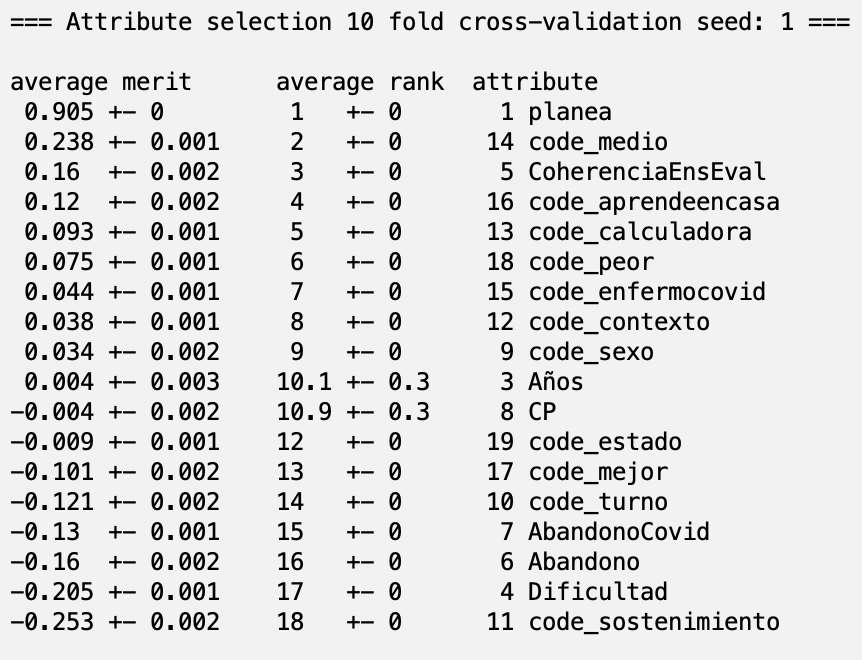

In [35]:
df_nuevo=df_categorias[['niveldes','planea', 'code_sostenimiento', 'code_medio', 'Dificultad', 'CoherenciaEnsEval', 'Abandono', 'AbandonoCovid', 
                        'code_aprendeencasa', 'code_turno', 'code_mejor', 'code_calculadora']].copy()
df_nuevo

,niveldes,planea,code_sostenimiento,code_medio,Dificultad,CoherenciaEnsEval,Abandono,AbandonoCovid,code_aprendeencasa,code_turno,code_mejor,code_calculadora
780,2,514,0,3,3,5,0.0,0.0,5,0,0,0
781,2,506,0,3,4,5,0.0,0.0,1,0,0,0
782,1,388,0,0,4,5,0.0,0.0,5,0,0,0
783,2,506,0,3,3,5,0.0,0.0,1,0,0,0
784,4,596,0,3,3,5,0.0,0.0,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46343,4,596,1,0,3,4,0.0,0.0,4,0,0,0
46344,4,650,1,0,2,5,1.0,1.0,1,0,0,1
46345,2,540,1,3,4,4,0.0,0.0,0,0,0,1
46346,2,540,1,3,4,4,0.0,0.0,0,0,0,1


In [36]:
print(df_nuevo.describe())

           niveldes        planea  code_sostenimiento    code_medio  \
count  45566.000000  45566.000000        45566.000000  45566.000000   
mean       1.850415    486.493526            0.765044      0.536497   
std        1.098231     98.468500            0.423976      0.690180   
min        1.000000    200.000000            0.000000      0.000000   
25%        1.000000    413.000000            1.000000      0.000000   
50%        1.000000    475.000000            1.000000      0.000000   
75%        3.000000    550.000000            1.000000      1.000000   
max        4.000000    800.000000            1.000000      3.000000   

         Dificultad  CoherenciaEnsEval      Abandono  AbandonoCovid  \
count  45566.000000       45566.000000  45566.000000   45566.000000   
mean       3.443971           3.765988      1.269565       1.836984   
std        0.853989           0.994837      2.383085       2.946902   
min        1.000000           1.000000      0.000000       0.000000   
25%  

Ahora, empezamos a relacionar las columnas con el nivel de desepeño

* 0=privada
* 1=pública

In [37]:
porcentaje_publica=df_nuevo[(df_nuevo['code_sostenimiento']==1)].count()/df_nuevo['code_sostenimiento'].count()
porcentaje_privada=df_nuevo[(df_nuevo['code_sostenimiento']==0)].count()/df_nuevo['code_sostenimiento'].count()

print(porcentaje_publica.unique())
print(porcentaje_privada.unique())

[0.76504411]
[0.23495589]


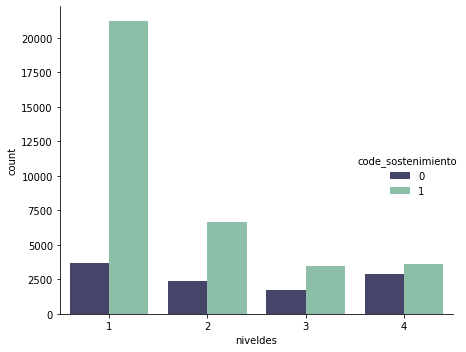

In [38]:
sns.catplot(x = 'niveldes', hue = 'code_sostenimiento', kind = 'count', data = df_nuevo , palette=["#3f3e6fd1", "#85c6a9"])

plt.tight_layout()

##Gráficas comparando cada variable

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [40]:
crosstable=pd.crosstab(df_nuevo['niveldes'],df_nuevo['code_sostenimiento'])
crosstable

code_sostenimiento,0,1
niveldes,,
1,3714,21208
2,2394,6618
3,1717,3441
4,2881,3593


codigo de sostenimiento:
* 0=privada
* 1=pública

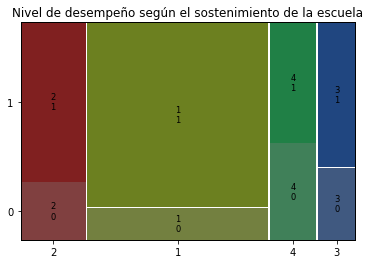

In [41]:
mosaic(df_nuevo, ['niveldes', 'code_sostenimiento'], title='Nivel de desempeño según el sostenimiento de la escuela')
plt.show()

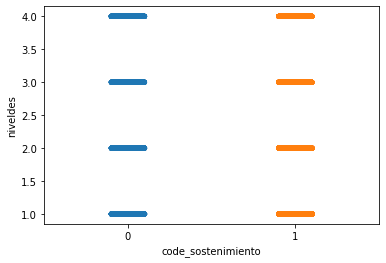

In [42]:
sns.stripplot(y="niveldes", x="code_sostenimiento", data=df_nuevo)

codigo medio:

* 0=Celular
* 1=Computadora o laptop
* 2=En físico (capturado por el/la docente)
* 3=Tableta

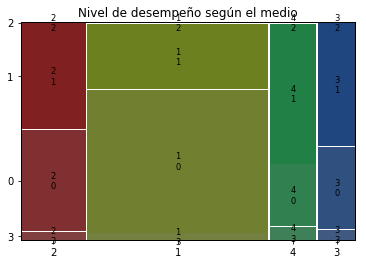

In [43]:
mosaic(df_nuevo, ['niveldes', 'code_medio'], title='Nivel de desempeño según el medio')
plt.show()

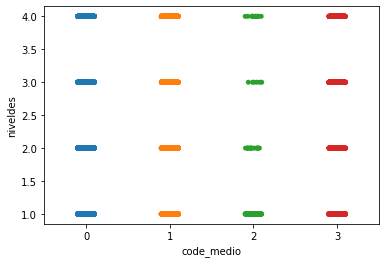

In [44]:
sns.stripplot(y="niveldes", x="code_medio", data=df_nuevo)

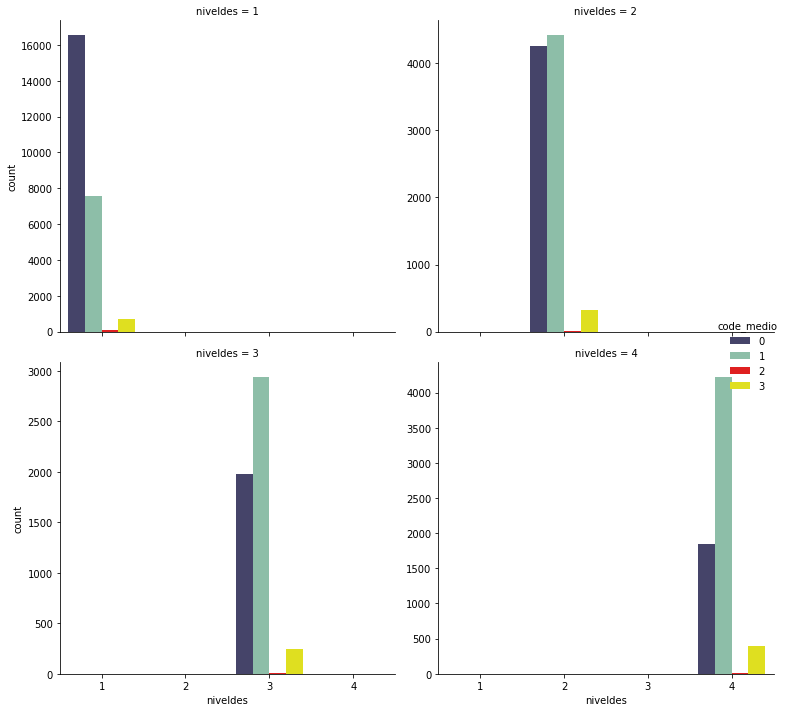

In [45]:
sns.catplot(x = 'niveldes', hue = 'code_medio',  col = 'niveldes',col_wrap=2, sharey=False,kind = 'count', data = df_nuevo , palette=["#3f3e6fd1", "#85c6a9","red", "yellow"])

plt.tight_layout()

codigo de dificultad: del 1 al 5, donde 1 es muy fácil y 5 muy difícil

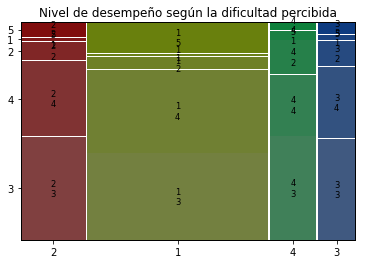

In [46]:
mosaic(df_nuevo, ['niveldes', 'Dificultad'], title='Nivel de desempeño según la dificultad percibida')
plt.show()

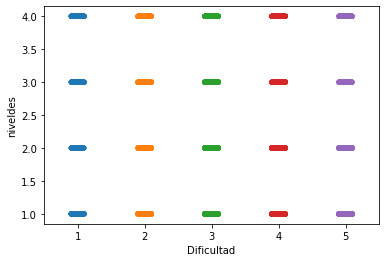

In [47]:
sns.stripplot(y="niveldes", x="Dificultad", data=df_nuevo)

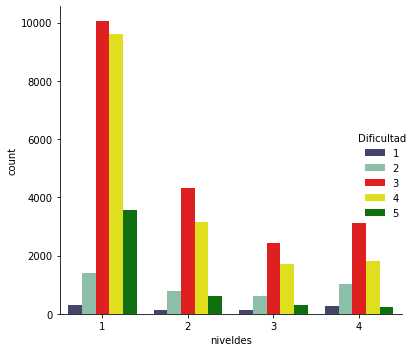

In [48]:
sns.catplot(x = 'niveldes', hue = 'Dificultad', kind = 'count', data = df_nuevo , palette=["#3f3e6fd1", "#85c6a9","red", "yellow", "green"])

plt.tight_layout()

Coherencia con lo visto en clase

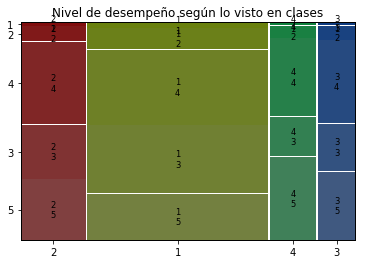

In [49]:
mosaic(df_nuevo, ['niveldes', 'CoherenciaEnsEval'], title='Nivel de desempeño según lo visto en clases')
plt.show()

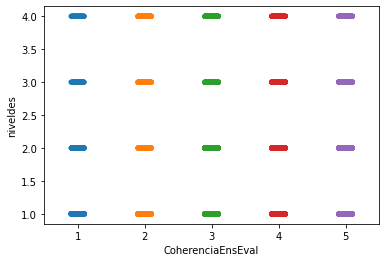

In [50]:
sns.stripplot(y="niveldes", x="CoherenciaEnsEval", data=df_nuevo)

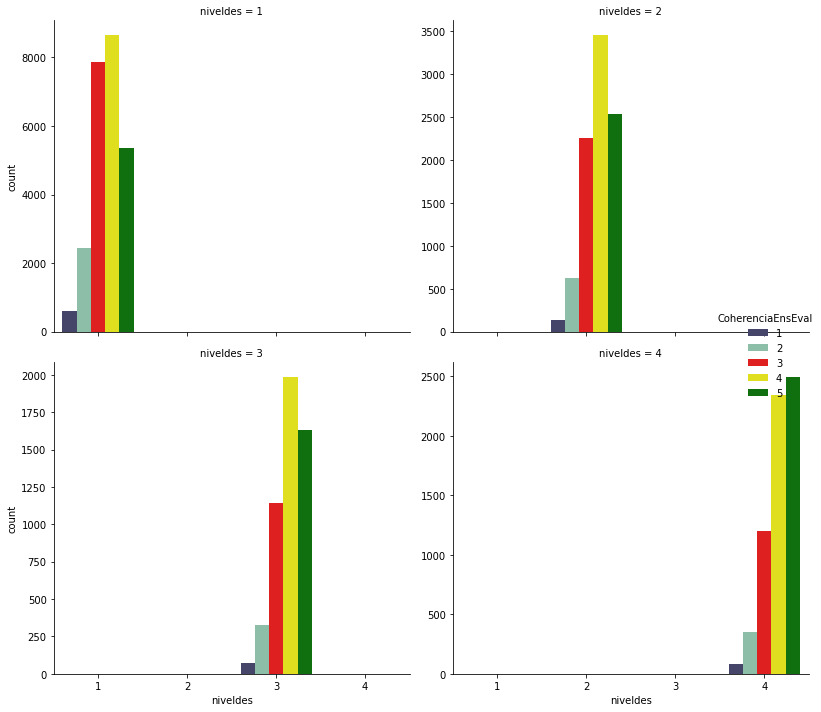

In [51]:
sns.catplot(x = 'niveldes', hue = 'CoherenciaEnsEval', col = 'niveldes',col_wrap=2, sharey=False, kind = 'count', data = df_nuevo , palette=["#3f3e6fd1", "#85c6a9","red", "yellow","green"])

plt.tight_layout()

Abandono:

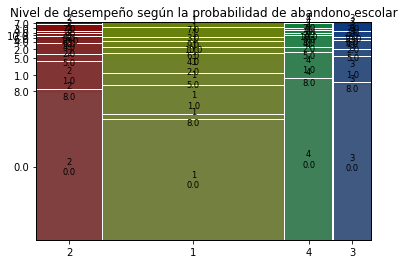

In [52]:
mosaic(df_nuevo, ['niveldes', 'Abandono'], title='Nivel de desempeño según la probabilidad de abandono escolar')
plt.show()

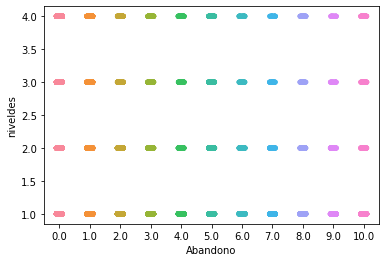

In [53]:
sns.stripplot(y="niveldes", x="Abandono", data=df_nuevo)

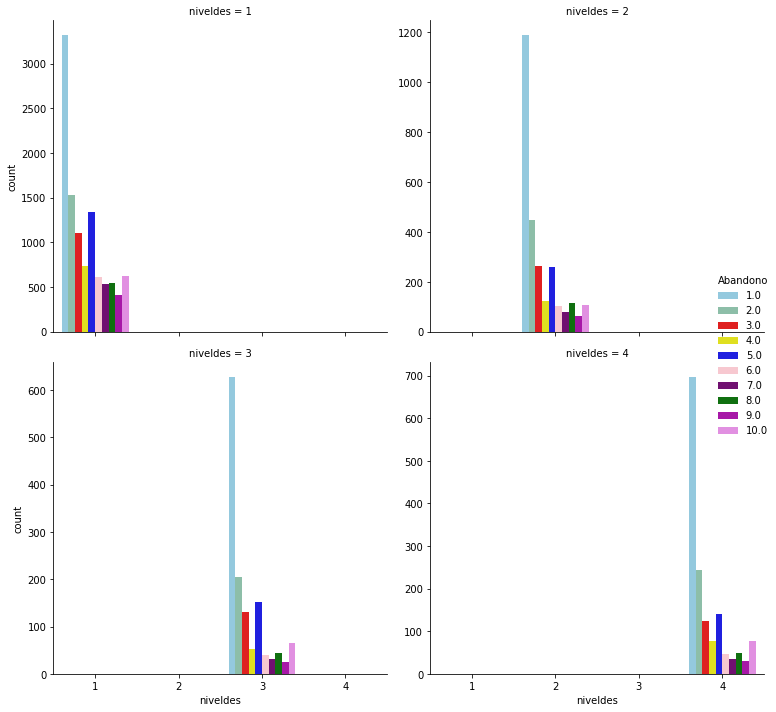

In [54]:
sns.catplot(x = 'niveldes', hue = 'Abandono', col = 'niveldes', col_wrap=2, sharey=False, kind = 'count', data = df_nuevo.query('Abandono!=0') , palette=["skyblue", "#85c6a9","red", "yellow", "blue", "pink", "purple", "green", "m", "violet", "orange"])

plt.tight_layout()

Abandono COVID:

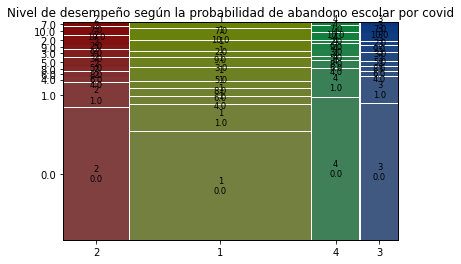

In [55]:
mosaic(df_nuevo, ['niveldes', 'AbandonoCovid'], title='Nivel de desempeño según la probabilidad de abandono escolar por covid')
plt.show()

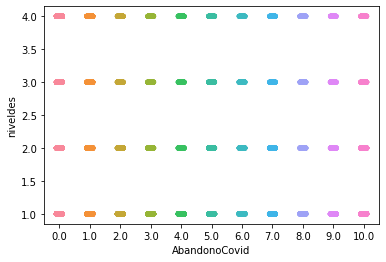

In [56]:
sns.stripplot(y="niveldes", x="AbandonoCovid", data=df_nuevo)

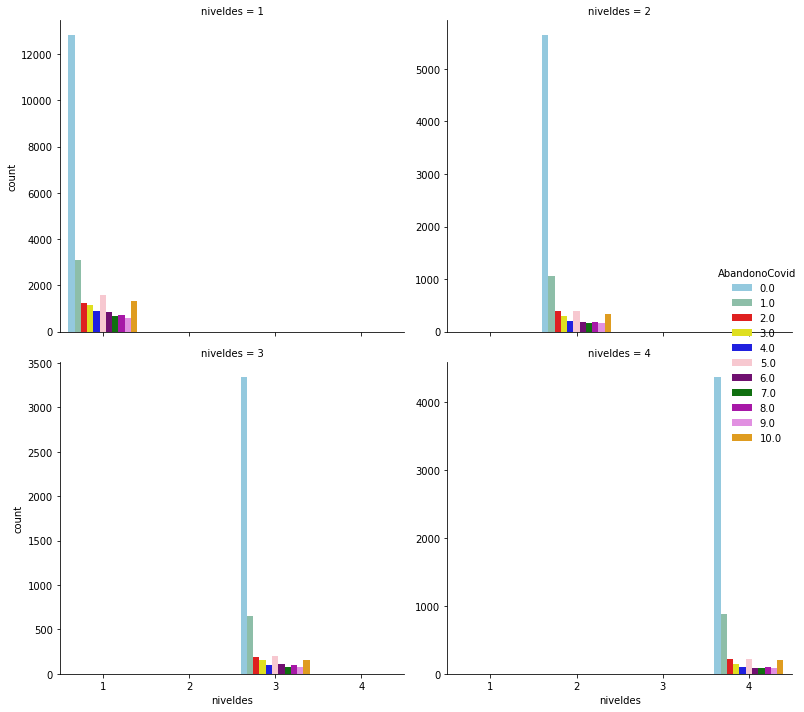

In [83]:
sns.catplot(x = 'niveldes', hue = 'AbandonoCovid', col = 'niveldes', col_wrap=2, sharey=False, kind = 'count', data = df_nuevo , palette=["skyblue", "#85c6a9","red", "yellow", "blue", "pink", "purple", "green", "m", "violet", "orange"])

plt.tight_layout()

Aprende en casa

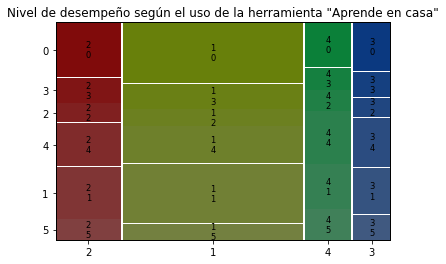

In [58]:
mosaic(df_nuevo, ['niveldes', 'code_aprendeencasa'], title='Nivel de desempeño según el uso de la herramienta "Aprende en casa"')
plt.show()

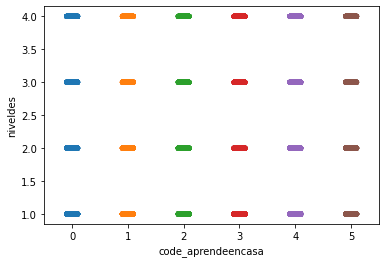

In [59]:
sns.stripplot(y="niveldes", x="code_aprendeencasa", data=df_nuevo)

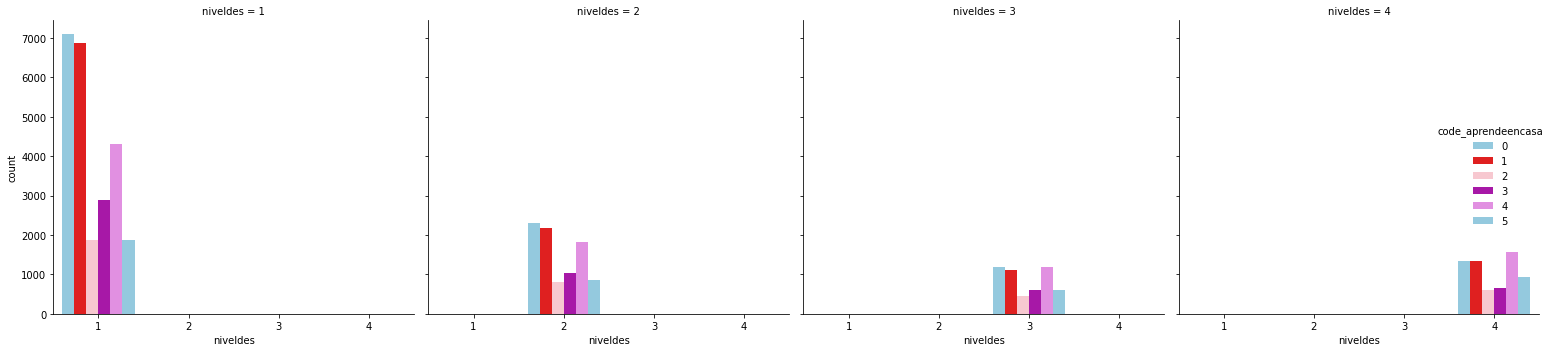

In [60]:
sns.catplot(x = 'niveldes', hue = 'code_aprendeencasa', col = 'niveldes', kind = 'count', data = df_nuevo , palette=["skyblue","red", "pink", "m", "violet"])

plt.tight_layout()

Turno

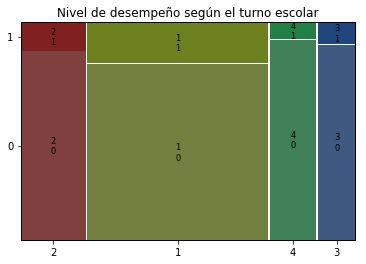

In [61]:
mosaic(df_nuevo, ['niveldes', 'code_turno'], title='Nivel de desempeño según el turno escolar')
plt.show()

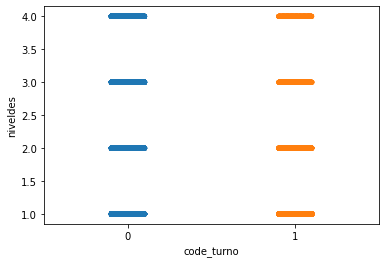

In [62]:
sns.stripplot(y="niveldes", x="code_turno", data=df_nuevo)

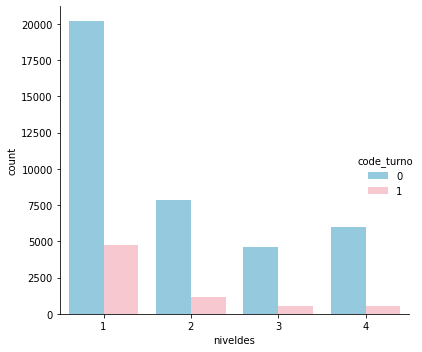

In [63]:
sns.catplot(x = 'niveldes', hue = 'code_turno', kind = 'count', data = df_nuevo , palette=["skyblue", "pink"])

plt.tight_layout()

Mejor

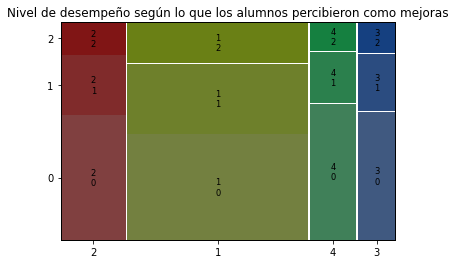

In [64]:
mosaic(df_nuevo, ['niveldes', 'code_mejor'], title='Nivel de desempeño según lo que los alumnos percibieron como mejoras')
plt.show()

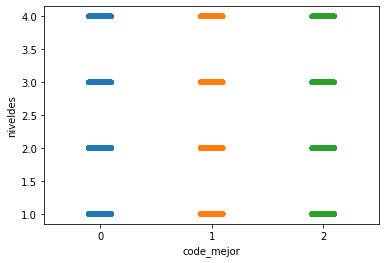

In [65]:
sns.stripplot(y="niveldes", x="code_mejor", data=df_nuevo)

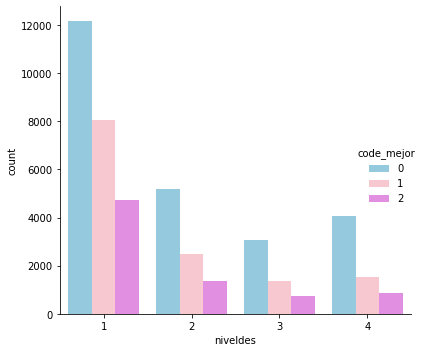

In [81]:
sns.catplot(x = 'niveldes', hue = 'code_mejor', kind = 'count', data = df_nuevo , palette=["skyblue","pink", "violet"])

plt.tight_layout()

Calculadora

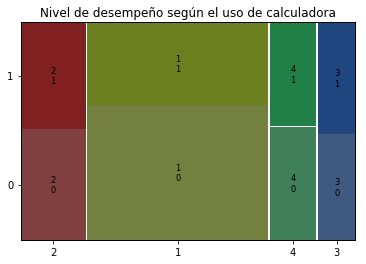

In [67]:
mosaic(df_nuevo, ['niveldes', 'code_calculadora'], title='Nivel de desempeño según el uso de calculadora')
plt.show()

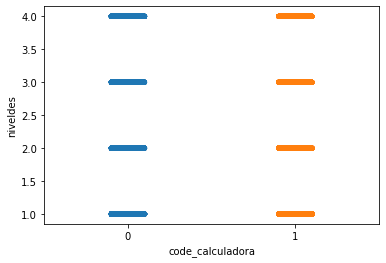

In [68]:
sns.stripplot(y="niveldes", x="code_calculadora", data=df_nuevo)

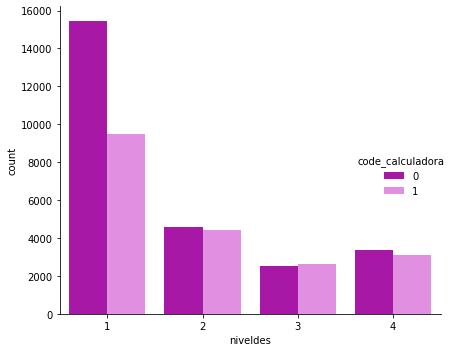

In [82]:
sns.catplot(x = 'niveldes', hue = 'code_calculadora', kind = 'count', data = df_nuevo , palette=["m", "violet"])

plt.tight_layout()

##Agrupamiento

In [70]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

Podemos observar que la mayor parte de los estudiantes de los cuales tenemos datos se encuentran en un nivel insuficiente, esto hace que los datos que tenemos estén desnivelados, es decir, no tenemos datos de grupos iguales

In [71]:
# class distribution
print(df_nuevo.groupby("niveldes").size())

niveldes
1    24922
2     9012
3     5158
4     6474
dtype: int64


In [72]:
!pip install kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Usamos el método del codo para saber en cuántos grupos nos conviene separar nuestro grupo para el modelo

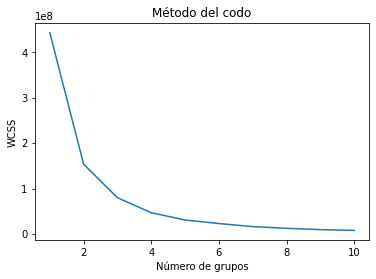

Elbow:  3


In [73]:
# get all features except the class
data_clust = df_nuevo.loc[:, df_nuevo.columns != "niveldes"]

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_clust)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de grupos')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# verifies the plot versus knee locator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print("Elbow: ",kl.elbow)

El numero óptimo de k es 3, por lo que el clustering se hará con k=3

In [74]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 300, n_init = 10, random_state = 0) #Applying Kmeans classifier
y_kmeans = kmeans.fit_predict(data_clust)
print(kmeans.cluster_centers_) #display cluster centers

[[3.99991734e+02 8.66885081e-01 3.64264113e-01 3.62636089e+00
  3.59591734e+00 1.77187500e+00 2.29732863e+00 1.80715726e+00
  2.00151210e-01 7.22026210e-01 3.57560484e-01]
 [6.47955401e+02 5.65609693e-01 8.26501676e-01 3.13237948e+00
  4.03454499e+00 7.19644238e-01 1.26037639e+00 2.37651457e+00
  7.87574117e-02 5.05671565e-01 4.87238979e-01]
 [5.12293522e+02 7.38702137e-01 6.01458148e-01 3.37711487e+00
  3.83782280e+00 9.52359751e-01 1.57763802e+00 2.07346394e+00
  1.30676759e-01 5.84149599e-01 4.88256901e-01]]


In [75]:
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(data_clust)
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=["CP1","CP2", "CP3"])
principalDf["labels"] = kmeans.labels_
principalDf

,CP1,CP2,CP3,labels
0,3.617381,1.285956,0.470983,2
1,2.687656,0.661565,0.226185,2
2,1.185272,0.390068,-0.448363,0
3,2.958999,0.454211,0.910734,2
4,3.753783,1.355010,0.925129,1
...,...,...,...,...
45561,0.857861,-0.854026,0.283347,1
45562,1.184261,-0.995317,1.229782,1
45563,1.692082,-0.034601,-0.883139,2
45564,1.692082,-0.034601,-0.883139,2


Se grafican los grupos del modelo

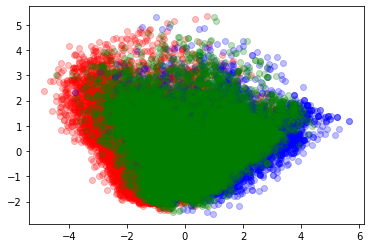

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]


x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]



ax.scatter(x_0, y_0, c='red', marker='o', alpha=0.25)
ax.scatter(x_1, y_1, c='blue', marker='o', alpha =0.25)
ax.scatter(x_2, y_2, c='green', marker='o', alpha=0.25)

plt.show()

In [77]:
colors=principalDf['labels'].map({0: 'blue', 1:'red', 2:'green'})

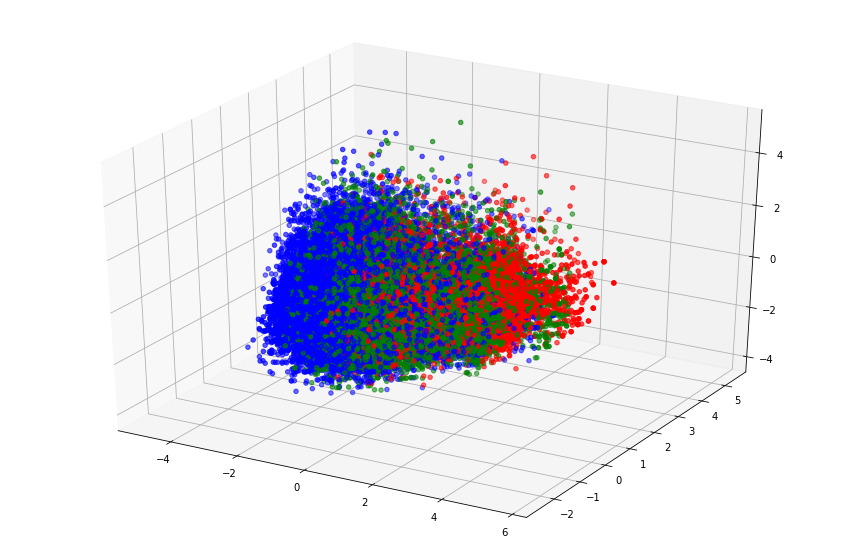

In [78]:
fig, ax = plt.subplots(subplot_kw = {'projection':'3d'}, figsize=(15, 10))

cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]


x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]
z_0 = cluster_0["CP3"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]
z_1 = cluster_1["CP3"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]
z_2 = cluster_2["CP3"]

ax.scatter(principalDf['CP1'],  principalDf['CP2'], principalDf['CP3'],
           color=colors)

#ax.scatter(x_0, y_0, z_0, c='red', marker='o', alpha=0.25)
#ax.scatter(x_1, y_1, z_1, c='blue', marker='o', alpha =0.25)
#ax.scatter(x_2, y_2, z_2, c='green', marker='o', alpha=0.25)

plt.show()

Se separa en dos grupos, uno es el nivel de desarrollo (que es la variable con la que vamos a comparar) y otro son todas las variables restantes que lo describen

In [79]:
# Split-out validation dataset
X = df_nuevo.drop("niveldes",axis=1)
y = df_nuevo["niveldes"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [80]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=10,solver='sgd',learning_rate_init= 0.01, max_iter=500)))
# evaluate each model in turn
results = []
names = []
values = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
  values.append(cv_results.mean())

LR: 0.834556 (0.002813)
LDA: 0.908390 (0.003337)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.957769 (0.003128)


KeyboardInterrupt: ignored

In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
predictions

In [ ]:
# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))